# C.O.R.

Bibliotecas

In [1]:
import pandas as pd
import re
import xarray as xr
import os
import numpy as np


## Pluviometrica

Importar os datasets do xarray

In [2]:
ds = xr.open_dataset('19970101_20211231.nc')
ds

<xarray.Dataset>
Dimensions:   (index: 26653766)
Coordinates:
  * index     (index) int64 0 1 2 3 4 ... 26653762 26653763 26653764 26653765
Data variables:
    15min     (index) float64 ...
    01h       (index) float64 ...
    04h       (index) float64 ...
    24h       (index) float64 ...
    96h       (index) float64 ...
    datetime  (index) datetime64[ns] ...
    station   (index) object ...
Attributes:
    naming_authority:  Alerta Rio
    instrument:        Rain Gauge Station
    variable:          precipitation
    period:            1997-01-01 to 2021-12-31
    timezone:          America/Sao_Paulo

Convertendo xarray para dataframe de pandas

In [3]:
df = ds.to_dataframe()
df

,15min,01h,04h,24h,96h,datetime,station
index,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaT,tanque
1,NaN,NaN,NaN,NaN,NaN,1997-01-01 01:12:20,tanque
2,0.0,NaN,NaN,NaN,NaN,1997-01-01 01:27:20,tanque
3,0.0,NaN,NaN,NaN,NaN,1997-01-01 01:42:20,tanque
4,0.0,NaN,NaN,NaN,NaN,1997-01-01 01:57:20,tanque
...,...,...,...,...,...,...,...
26653761,0.0,0.0,0.2,11.6,25.8,2021-12-31 23:00:00,guaratiba
26653762,0.0,0.0,0.2,11.4,25.8,2021-12-31 23:15:00,guaratiba
26653763,0.2,0.2,0.4,11.6,26.0,2021-12-31 23:30:00,guaratiba


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


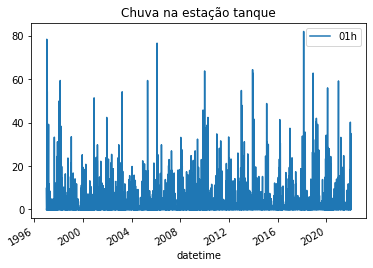

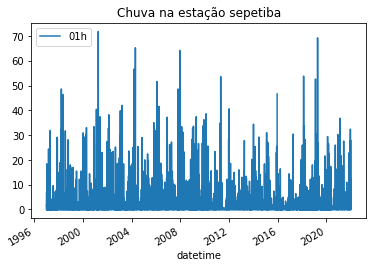

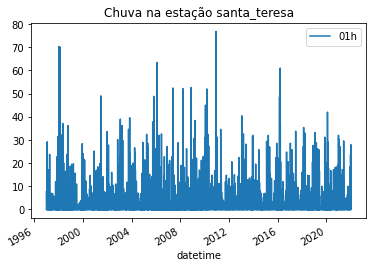

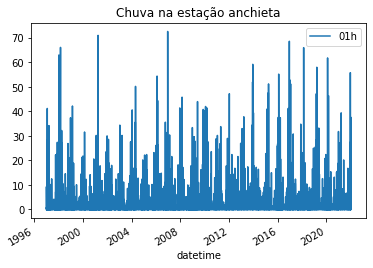

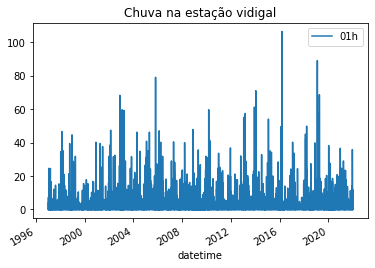

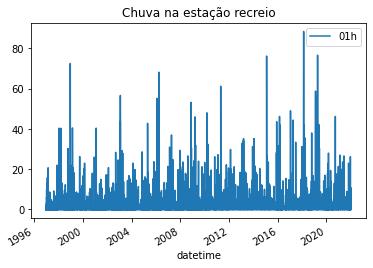

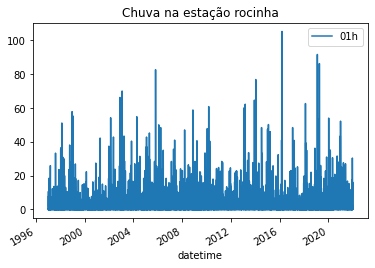

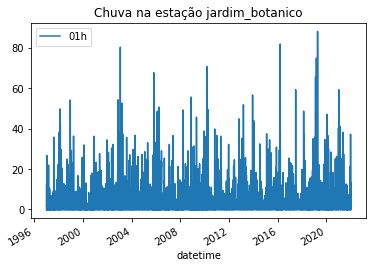

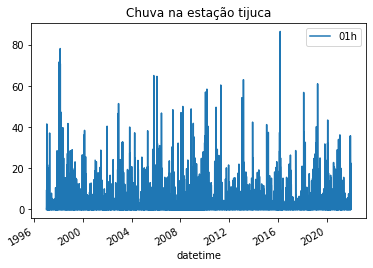

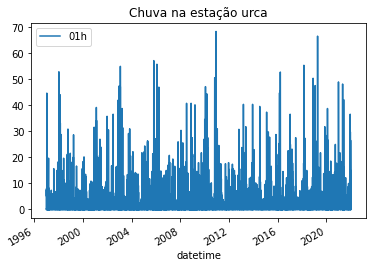

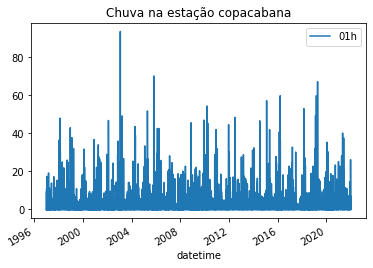

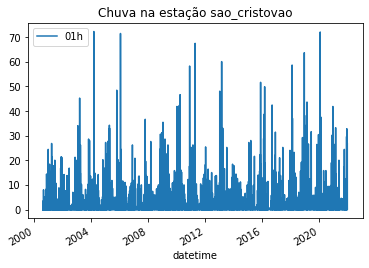

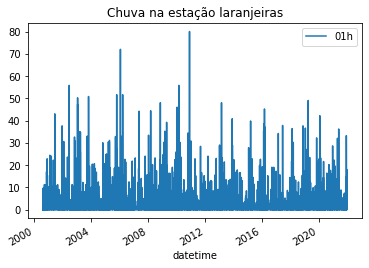

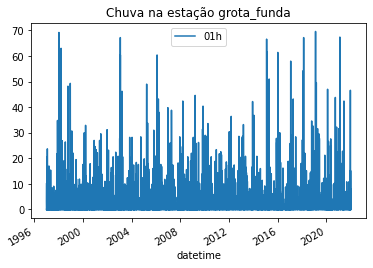

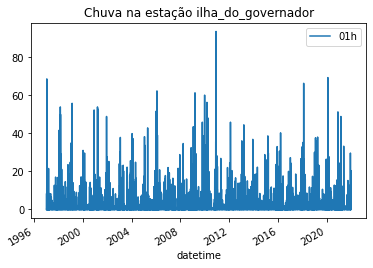

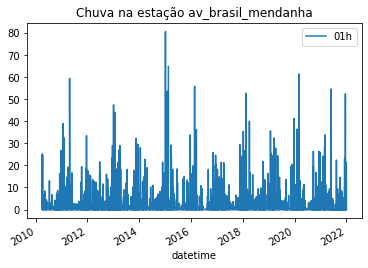

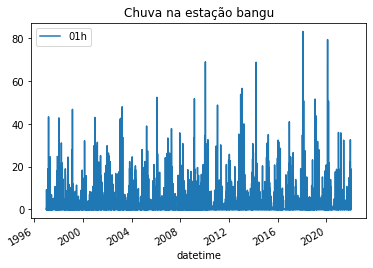

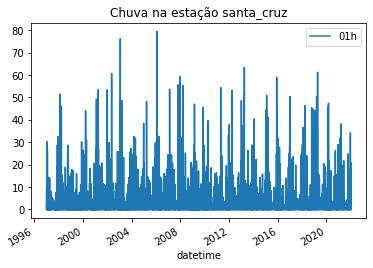

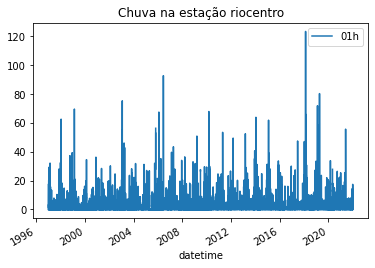

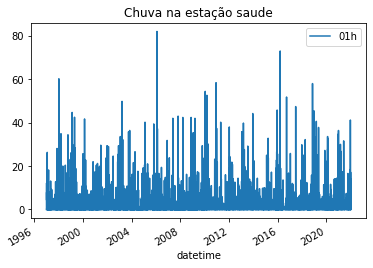

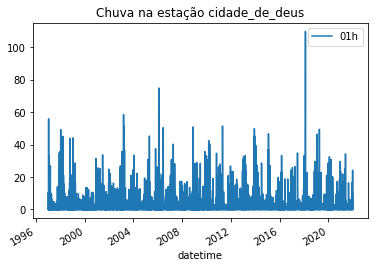

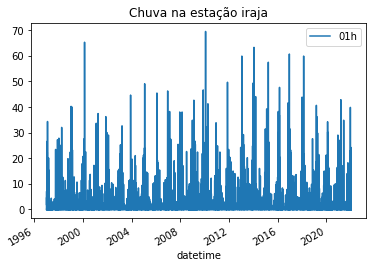

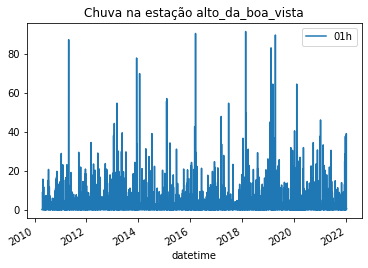

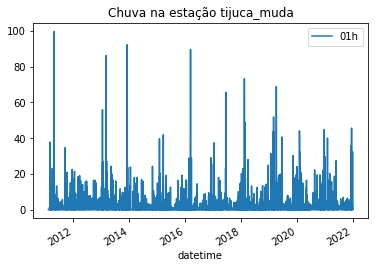

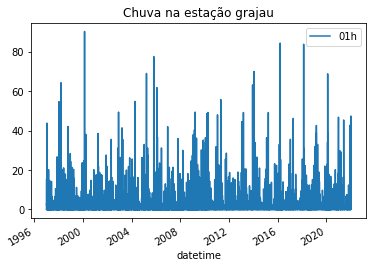

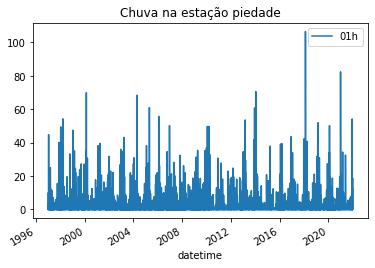

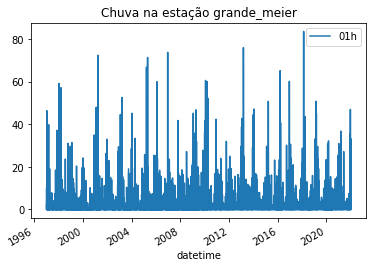

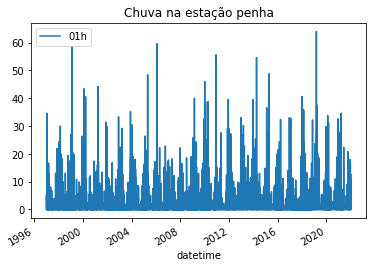

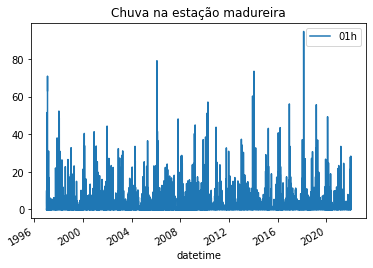

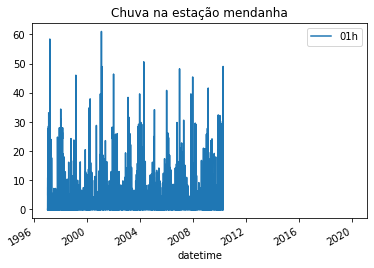

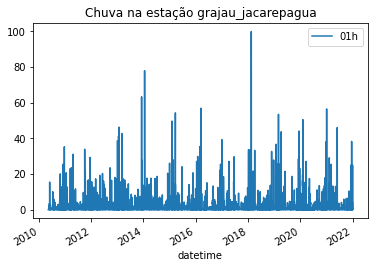

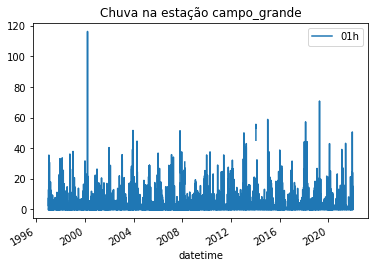

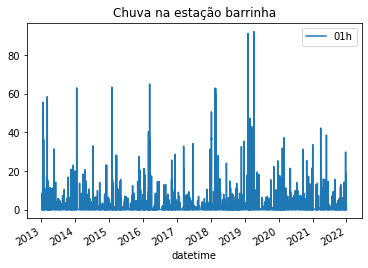

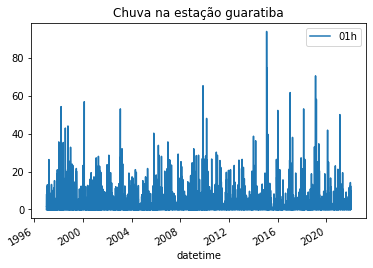

In [220]:
lista = list(df['station'].drop_duplicates())

for est in lista:
    df_est = df[df['station'] == est]
    df_est.plot.line('datetime', ['01h'], title='Chuva na estação ' + est)

In [6]:
teste = df.to_xarray()


<xarray.Dataset>
Dimensions:   (index: 26653766)
Coordinates:
  * index     (index) int64 0 1 2 3 4 ... 26653762 26653763 26653764 26653765
Data variables:
    15min     (index) float64 nan nan 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.2 0.0 nan
    01h       (index) float64 nan nan nan nan nan 0.0 ... 0.0 0.0 0.2 0.2 nan
    04h       (index) float64 nan nan nan nan nan nan ... 0.2 0.2 0.4 0.4 nan
    24h       (index) float64 nan nan nan nan nan ... 11.6 11.4 11.6 11.4 nan
    96h       (index) float64 nan nan nan nan nan ... 25.8 25.8 26.0 26.0 nan
    datetime  (index) datetime64[ns] NaT 1997-01-01T01:12:20 ... NaT
    station   (index) object 'tanque' 'tanque' ... 'guaratiba' 'guaratiba'

## Meteorológica

Geração das funções que serão utilizadas par os dados

In [10]:
def corrige_txt(nom_estacao, ano, mes):
    for num1 in ano:
        for num2 in mes:
            file = "D:/Programacao/TCC/Meus/Dados/COR/meteorologica/" + \
                nom_estacao + "_" + num1 + num2 + "_Met.txt"
            if os.path.exists(file):
                fin = open(file, "rt")
                if not os.path.exists("D:/Programacao/TCC/Meus/Dados/COR/meteorologica/aux_"+ nom_estacao):
                    os.mkdir("D:/Programacao/TCC/Meus/Dados/COR/meteorologica/aux_"+ nom_estacao)
                fout = open("D:/Programacao/TCC/Meus/Dados/COR/meteorologica/aux_" + nom_estacao + "/" + nom_estacao + "_" + num1 + num2 + "_Met2.txt", "wt")
                count = 0
                for line in fin:
                    count += 1
                    if nom_estacao == 'guaratiba':
                        fout.write(re.sub('\s+', ' ', line.replace(':40      ', ':00  HBV')))
                    else:
                        fout.write(re.sub('\s+', ' ', line.replace(':00      ', ':00  HBV')))
                    fout.write('\n')
                if count == 6:
                    fout.write('01/' + num2 + '/'+num1 + ' 00:00:00 HBV ND ND ND ND ND ND')
                fin.close()
                fout.close()
            else:
                pass


def gera_dataset(nom_estacao, ano, mes):
    data1 = pd.DataFrame()

    for num1 in ano:
        check = 0
        for num2 in mes:
            texto = 'D:/Programacao/TCC/Meus/Dados/COR/meteorologica/aux_' + nom_estacao + '/' + nom_estacao + '_' + num1 + num2 + '_Met2.txt'
            if os.path.exists(texto):
                data1 = pd.read_csv(texto, sep=' ', skiprows=[0, 1, 2, 3, 4, 5], header=None)
                if len(data1.columns) == 10:
                    data1.columns = ['Dia', 'Hora', 'HBV', 'Chuva', 'DirVento','VelVento', 'Temperatura', 'Pressao', 'Umidade', 'teste']
                    del data1["teste"]
                else:
                    data1.columns = ['Dia', 'Hora', 'HBV', 'Chuva', 'DirVento','VelVento', 'Temperatura', 'Pressao', 'Umidade']
                data1['Chuva'] = data1['Chuva'][~data1['Chuva'].isin(['-', 'ND'])].astype(float)
                data1['Umidade'] = data1['Umidade'][data1['Umidade'] != 'ND'].astype(float)
                data1['Temperatura'] = data1['Temperatura'][data1['Temperatura'] != 'ND'].astype(float)
                data1['DirVento'] = data1['DirVento'][~data1['DirVento'].isin(['-', 'ND'])].astype(float)
                data1['VelVento'] = data1['VelVento'][data1['VelVento'] != 'ND'].astype(float)
                data1['Pressao'] = data1['Pressao'][data1['Pressao'] != 'ND'].astype(float)
                data1['Dia'] = pd.to_datetime(data1['Dia'], format='%d/%m/%Y')
                ano_aux = num1
                mes_aux = num2
                print(num1 + '/' + num2)
                check = 1
                break
            else:
                pass
        if check == 1:
            break
        
    ano1 = list(map(str,range(int(ano_aux),2022)))
    mes1 = list(range(int(mes_aux),13))
    mes1 = [str(i).rjust(2, '0') for i in mes1]

    for num1 in ano1:
        for num2 in mes1:
            texto = 'D:/Programacao/TCC/Meus/Dados/COR/meteorologica/aux_' + nom_estacao + '/' + nom_estacao + '_' + num1 + num2 + '_Met2.txt'
            if os.path.exists(texto):
                data2 = pd.read_csv(texto, sep=' ', skiprows=[0, 1, 2, 3, 4, 5], header=None, on_bad_lines='skip')
                if len(data2.columns) == 10:
                    data2.columns = ['Dia', 'Hora', 'HBV', 'Chuva', 'DirVento','VelVento', 'Temperatura', 'Pressao', 'Umidade', 'teste']
                    del data2["teste"]
                else:
                    data2.columns = ['Dia', 'Hora', 'HBV', 'Chuva', 'DirVento','VelVento', 'Temperatura', 'Pressao', 'Umidade']
                data2['Chuva'] = data2['Chuva'][~data2['Chuva'].isin(['-', 'ND'])].astype(float)
                data2['Umidade'] = data2['Umidade'][data2['Umidade'] != 'ND'].astype(float)
                data2['Temperatura'] = data2['Temperatura'][~data2['Temperatura'].isin(['-', 'ND'])].astype(float)
                data2['DirVento'] = data2['DirVento'][~data2['DirVento'].isin(['-', 'ND'])].astype(float)
                data2['VelVento'] = data2['VelVento'][data2['VelVento'] != 'ND'].astype(float)
                data2['Pressao'] = data2['Pressao'][data2['Pressao'] != 'ND'].astype(float)
                data2['Dia'] = pd.to_datetime(data2['Dia'], format='%d/%m/%Y')
                saida = pd.concat([data1, data2])
                data1 = saida
                del saida
            else:
                pass
    if num1 == ano_aux:
        mes1 = list(range(1,13))
        mes1 = [str(i).rjust(2, '0') for i in mes1]
    data1 = data1.replace('ND', np.NaN)
    data1 = data1.replace('-', np.NaN)
    data1['estacao'] = nom_estacao
    data1.to_csv(nom_estacao + '.csv')
    data_aux = data1
    del data1, data2
    return data_aux


def pre_processamento(nom_estacao):
    ano  = list(map(str,range(1997,2022)))
    mes = list(range(1,13))
    mes = [str(i).rjust(2, '0') for i in mes]

    corrige_txt(nom_estacao, ano, mes)
    
    data = gera_dataset(nom_estacao, ano, mes)
    data.plot.line('Dia', ['Chuva'], title='Chuva')
    data.plot.line('Dia', ['Temperatura'], title='Temperatura')
    data.plot.line('Dia', ['Umidade'], title='Umidade')
    del data
    #data1.plot.line('Dia',['DirVento'], title = 'Direção Vento')
    #data1.plot.line('Dia',['VelVento'], title = 'Velocidade Vento')
    #data1.plot.line('Dia',['Pressao'], title = 'Pressao')


Removendo espaços em branco

In [13]:
ano = ['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
mes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


for num1 in ano:
    for num2 in mes:
        file = "D:/Programacao/TCC/Meus/Dados/COR/meteorologica/alto_da_boa_vista_" + \
            num1 + num2 + "_Met.txt"
        if os.path.exists(file):
            fin = open(file, "rt")
            fout = open("D:/Programacao/TCC/Meus/Dados/COR/meteorologica/auxiliar/alto_da_boa_vista_" +
                        num1 + num2 + "_Met2.txt", "wt")
            count = 0
            for line in fin:
                count += 1
                fout.write(
                    re.sub('\s+', ' ', line.replace(':00      ', ':00  HBV')))
                fout.write('\n')
            if count == 6:
                fout.write('01/' + num2 + '/'+num1 +
                           ' 00:00:00 HBV ND ND ND ND ND ND')
            fin.close()
            fout.close()


Unindo datasets

In [ ]:

data1 = pd.read_csv('D:/Programacao/TCC/Meus/Dados/COR/meteorologica/auxiliar/alto_da_boa_vista_199701_Met2.txt',
                    sep=' ', skiprows=[0, 1, 2, 3, 4, 5], header=None)
data1.columns = ['Dia', 'Hora', 'HBV', 'Chuva', 'DirVento',
                 'VelVento', 'Temperatura', 'Pressao', 'Umidade']
data1['Chuva'] = data1['Chuva'][data1['Chuva']
                                != 'ND'].astype(str).astype(float)
data1['Umidade'] = data1['Umidade'][data1['Umidade']
                                    != 'ND'].astype(str).astype(float)
data1['Temperatura'] = data1['Temperatura'][data1['Temperatura']
                                            != 'ND'].astype(str).astype(float)
data1['Dia'] = pd.to_datetime(data1['Dia'], format='%d/%m/%Y')
ano = ['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
mes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for num1 in ano:
    for num2 in mes:
        texto = 'D:/Programacao/TCC/Meus/Dados/COR/meteorologica/auxiliar/alto_da_boa_vista_' + \
            num1 + num2 + '_Met2.txt'
        if os.path.exists(texto):
            data2 = pd.read_csv(texto, sep=' ', skiprows=[
                                0, 1, 2, 3, 4, 5], header=None)
            if len(data2.columns) == 10:
                data2.columns = ['Dia', 'Hora', 'HBV', 'Chuva', 'DirVento',
                                 'VelVento', 'Temperatura', 'Pressao', 'Umidade', 'teste']
                del data2["teste"]
            else:
                data2.columns = ['Dia', 'Hora', 'HBV', 'Chuva', 'DirVento',
                                 'VelVento', 'Temperatura', 'Pressao', 'Umidade']
            data2['Chuva'] = data2['Chuva'][data2['Chuva']
                                            != 'ND'].astype(str).astype(float)
            data2['Umidade'] = data2['Umidade'][data2['Umidade']
                                                != 'ND'].astype(str).astype(float)
            data2['Temperatura'] = data2['Temperatura'][data2['Temperatura']
                                                        != 'ND'].astype(str).astype(float)
            data2['Dia'] = pd.to_datetime(data2['Dia'], format='%d/%m/%Y')
            data1 = pd.concat(data2)


C:\Users\pedro\AppData\Local\Temp\ipykernel_15836\596030692.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux_teste = pd.read_csv('guaratiba.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551422 entries, 0 to 551421
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   551422 non-null  int64  
 1   Dia          551422 non-null  object 
 2   Hora         551422 non-null  object 
 3   HBV          549586 non-null  object 
 4   Chuva        498161 non-null  float64
 5   DirVento     439647 non-null  float64
 6   VelVento     442782 non-null  float64
 7   Temperatura  471736 non-null  float64
 8   Pressao      420007 non-null  float64
 9   Umidade      156891 non-null  float64
 10  estacao      551422 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 46.3+ MB


<AxesSubplot:title={'center':'Chuva'}, xlabel='Dia'>

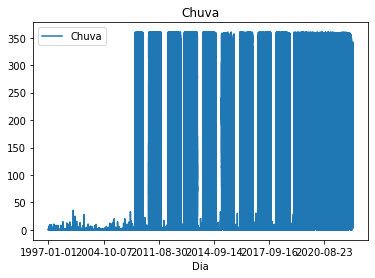

In [5]:
df_aux_teste = pd.read_csv('guaratiba.csv')
df_aux_teste.info()


df_aux_teste.plot.line('Dia', ['Chuva'], title='Chuva')

In [2]:
estacoes = ['alto_da_boa_vista','guaratiba','iraja','jardim_botanico','riocentro','santa_cruz','sao_cristovao','vidigal']
df_erro = pd.DataFrame(columns=['estacao', 'Chuva', 'DirVento','VelVento', 'Temperatura', 'Pressao', 'Umidade'])
#df_erro.columns = 
for est in estacoes:
    df_aux = pd.read_csv(est + '.csv')

    nans1 = 100 - round(df_aux['Chuva'].isna().sum()/df_aux.shape[0]*100,2)
    round(nans1,2)
    A = str(nans1).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans2 = 100 - round(df_aux['DirVento'].isna().sum()/df_aux.shape[0]*100,2)
    round(nans2,2)
    B = str(nans2).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans3 = 100 - round(df_aux['VelVento'].isna().sum()/df_aux.shape[0]*100,2)
    round(nans3,2)
    C = str(nans3).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans4 = 100 - round(df_aux['Temperatura'].isna().sum()/df_aux.shape[0]*100,2)
    round(nans4,2)
    D = str(nans4).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans5 = 100 - round(df_aux['Pressao'].isna().sum()/df_aux.shape[0]*100,2)
    round(nans5,2)
    E = str(nans5).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans6 = 100 - round(df_aux['Umidade'].isna().sum()/df_aux.shape[0]*100,2)
    round(nans6,2)
    F = str(nans6).rjust(4, '0')[0:5].ljust(5, '0') + '%'

    df_erro_aux = pd.DataFrame([[df_aux['estacao'][0],A,B,C,D,E,F]],columns=['estacao', 'Chuva', 'DirVento','VelVento', 'Temperatura', 'Pressao', 'Umidade'])
    df_erro = pd.concat([df_erro, df_erro_aux])

df_erro

C:\Users\pedro\AppData\Local\Temp\ipykernel_9052\397969435.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(est + '.csv')


,estacao,Chuva,DirVento,VelVento,Temperatura,Pressao,Umidade
0,alto_da_boa_vista,99.75%,00.00%,00.00%,91.83%,00.00%,76.50%
0,guaratiba,90.34%,79.73%,80.30%,85.55%,76.17%,28.45%
0,iraja,99.87%,00.00%,00.00%,79.60%,00.00%,71.11%
0,jardim_botanico,99.97%,00.00%,00.00%,86.63%,00.00%,81.38%
0,riocentro,99.59%,00.00%,00.00%,98.08%,00.00%,88.22%
0,santa_cruz,99.96%,00.00%,00.00%,96.74%,00.00%,99.19%
0,sao_cristovao,98.73%,58.34%,92.84%,92.76%,98.99%,92.44%
0,vidigal,99.89%,64.62%,87.60%,00.00%,00.00%,00.00%


In [5]:
a = df_erro.to_latex()
a

<bound method NDFrame.to_latex of              estacao   Chuva DirVento VelVento Temperatura Pressao Umidade
0  alto_da_boa_vista  99.75%   00.00%   00.00%      91.83%  00.00%  76.50%
0          guaratiba  90.34%   79.73%   80.30%      85.55%  76.17%  28.45%
0              iraja  99.87%   00.00%   00.00%      79.60%  00.00%  71.11%
0    jardim_botanico  99.97%   00.00%   00.00%      86.63%  00.00%  81.38%
0          riocentro  99.59%   00.00%   00.00%      98.08%  00.00%  88.22%
0         santa_cruz  99.96%   00.00%   00.00%      96.74%  00.00%  99.19%
0      sao_cristovao  98.73%   58.34%   92.84%      92.76%  98.99%  92.44%
0            vidigal  99.89%   64.62%   87.60%      00.00%  00.00%  00.00%>

2020/01


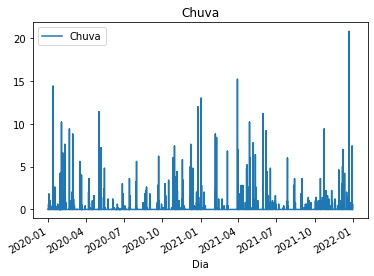

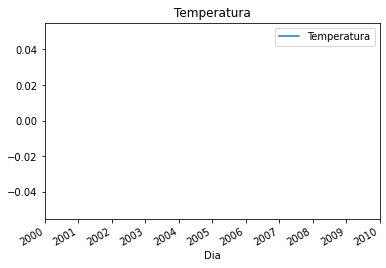

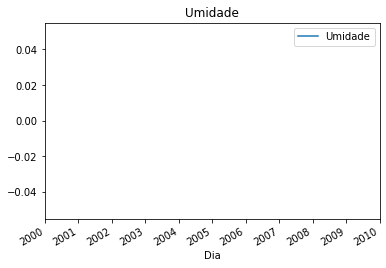

In [11]:
pre_processamento('vidigal')

1997/01


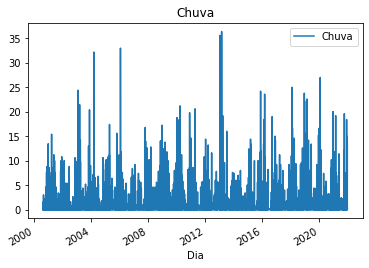

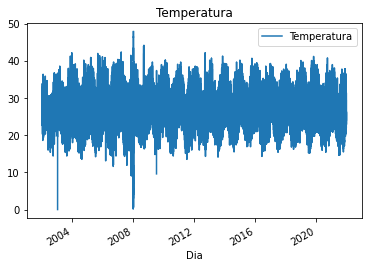

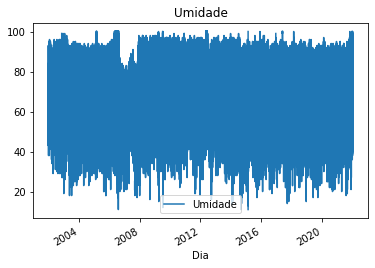

In [15]:
pre_processamento('sao_cristovao')

2014/03


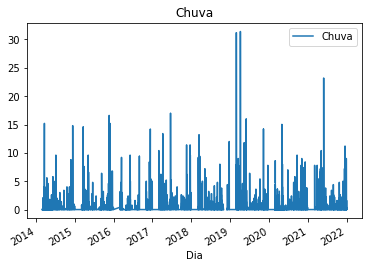

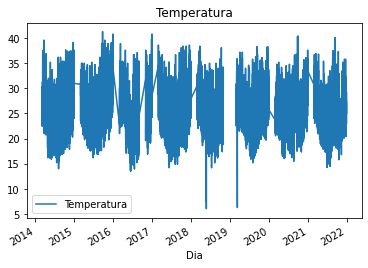

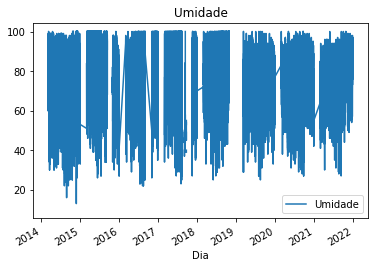

In [16]:
pre_processamento('riocentro')

2014/03


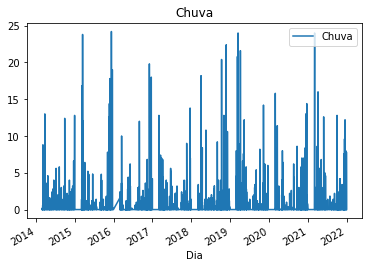

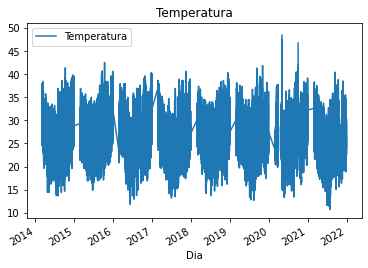

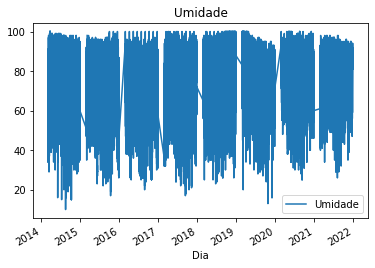

In [17]:
pre_processamento('santa_cruz')

2014/05


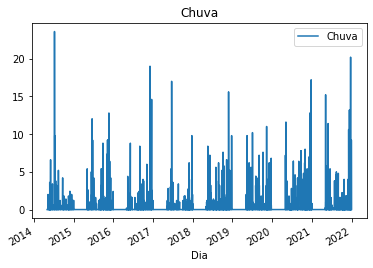

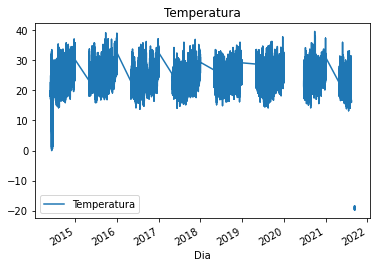

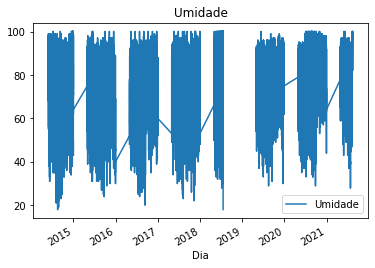

In [18]:
pre_processamento('jardim_botanico')

2014/12


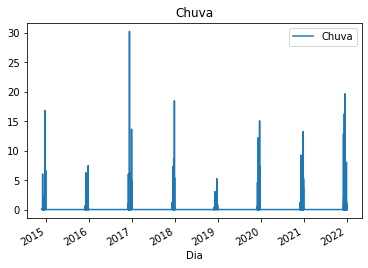

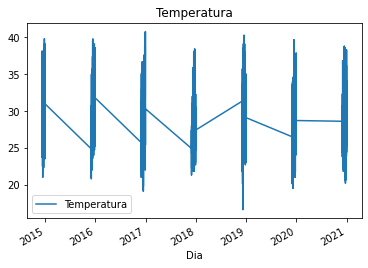

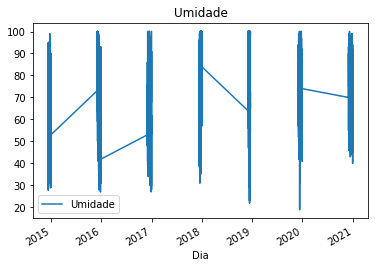

In [19]:
pre_processamento('iraja')


1997/01


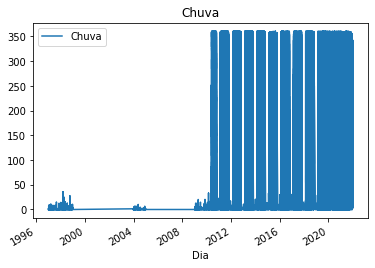

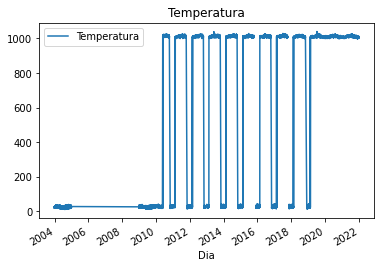

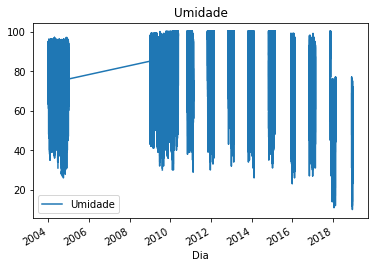

In [20]:
pre_processamento('guaratiba')


1997/01


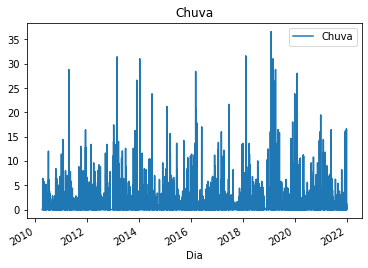

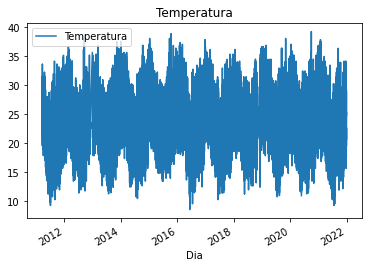

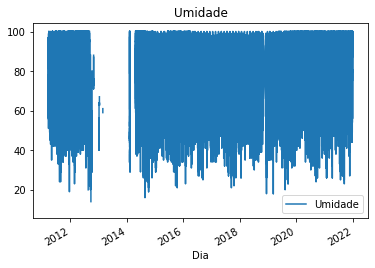

In [21]:
pre_processamento('alto_da_boa_vista')

União dos Datasets

In [22]:
estacoes = ['alto_da_boa_vista','guaratiba','iraja','jardim_botanico','riocentro','santa_cruz','sao_cristovao','vidigal']
df_xarray = pd.DataFrame()
for est in estacoes:
    df_aux = pd.read_csv(est + '.csv')
    df_aux = df_aux.iloc[: , 1:]
    df_xarray = pd.concat([df_xarray, df_aux])

df_xarray

C:\Users\pedro\AppData\Local\Temp\ipykernel_13484\3601020281.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(est + '.csv')


,Dia,Hora,HBV,Chuva,DirVento,VelVento,Temperatura,Pressao,Umidade,estacao
0,1997-01-01,00:00:00,HBV,NaN,NaN,NaN,NaN,NaN,NaN,alto_da_boa_vista
1,1997-01-01,00:00:00,HBV,NaN,NaN,NaN,NaN,NaN,NaN,alto_da_boa_vista
2,1997-02-01,00:00:00,HBV,NaN,NaN,NaN,NaN,NaN,NaN,alto_da_boa_vista
3,1997-03-01,00:00:00,HBV,NaN,NaN,NaN,NaN,NaN,NaN,alto_da_boa_vista
4,1997-04-01,00:00:00,HBV,NaN,NaN,NaN,NaN,NaN,NaN,alto_da_boa_vista
...,...,...,...,...,...,...,...,...,...,...
85166,2021-12-31,22:45:00,HBV,0.0,46.0,20.1,NaN,NaN,NaN,vidigal
85167,2021-12-31,23:00:00,HBV,0.0,18.0,17.3,NaN,NaN,NaN,vidigal
85168,2021-12-31,23:15:00,HBV,0.0,37.0,20.1,NaN,NaN,NaN,vidigal
85169,2021-12-31,23:30:00,HBV,0.0,32.0,14.4,NaN,NaN,NaN,vidigal


Conversão para xarrray

In [ ]:
df_xarray = df_xarray.to_xarray()

In [30]:
df_xarray

<xarray.Dataset>
Dimensions:      (index: 2474038)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 ... 85166 85167 85168 85169 85170
Data variables:
    Dia          (index) object '1997-01-01' '1997-01-01' ... '2021-12-31'
    Hora         (index) object '00:00:00' '00:00:00' ... '23:30:00' '23:45:00'
    HBV          (index) object 'HBV' 'HBV' 'HBV' 'HBV' ... 'HBV' 'HBV' 'HBV'
    Chuva        (index) float64 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    DirVento     (index) float64 nan nan nan nan nan ... 18.0 37.0 32.0 58.0
    VelVento     (index) float64 nan nan nan nan nan ... 17.3 20.1 14.4 11.5
    Temperatura  (index) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    Pressao      (index) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    Umidade      (index) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    estacao      (index) object 'alto_da_boa_vista' ... 'vidigal'

# INMET


Biblioteca

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import xarray as xr
import os
import numpy as np


Estações


In [2]:
# Novo data set
estacoes_inmet = pd.read_json('https://apitempo.inmet.gov.br/estacoes/T')
estacoes_inmet = estacoes_inmet[estacoes_inmet['SG_ESTADO'] == 'RJ']

estacoes_inmet.head()


,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
23,None,ANGRA DOS REIS,N,NaN,Operante,Automatica,-22.975556,0-76-0-3300100000000555,6,6.0,RJ,INMET,A628,-44.303333,2017-08-24T21:00:00.000-03:00
41,0-2000-0-86892,ARRAIAL DO CABO,N,NaN,Operante,Automatica,-22.975278,0-76-0-3300258000000108,6,5.0,RJ,INMET,A606,-42.021389,2006-09-21T21:00:00.000-03:00
98,0-2000-0-86854,CAMBUCI,N,NaN,Operante,Automatica,-21.587500,0-76-0-3300902000000025,6,46.0,RJ,INMET,A604,-41.958333,2002-11-19T22:00:00.000-02:00
109,0-2000-0-86855,CAMPOS DOS GOYTACAZES,N,NaN,Operante,Automatica,-21.714722,0-76-0-3301009000000109,6,17.0,RJ,INMET,A607,-41.343889,2006-09-24T21:00:00.000-03:00
110,0-2000-0-86890,CAMPOS DOS GOYTACAZES - SAO TOME,N,NaN,Operante,Automatica,-22.041667,0-76-0-3301009000000382,6,7.0,RJ,INMET,A620,-41.051667,2008-06-12T21:00:00.000-03:00


Geração do data set de cada estação

In [9]:
lista = estacoes_inmet
estacoes = estacoes_inmet[estacoes_inmet['CD_ESTACAO'].isin(
    ('A636', 'A621', 'A602', 'A652'))]
anos = list(range(1998, 2022))

'''
for j in list(range(0, len(estacoes))):
    dfnew2 = pd.read_json(
        'https://apitempo.inmet.gov.br/estacao/1997-01-01/1998-01-01/' + estacoes['CD_ESTACAO'].iloc[j])
    for i in anos:
        novo = pd.read_json('https://apitempo.inmet.gov.br/estacao/' + str(i) +
                            '-01-01/' + str(i+1) + '-01-01/' + estacoes['CD_ESTACAO'].iloc[j])
        uniao = [dfnew2, novo]
        dfnew2 = pd.concat(uniao)
    dfnew2.to_csv(estacoes['DC_NOME'].iloc[j] + '_1997_2022.csv')
'''

"\nfor j in list(range(0, len(estacoes))):\n    dfnew2 = pd.read_json(\n        'https://apitempo.inmet.gov.br/estacao/1997-01-01/1998-01-01/' + estacoes['CD_ESTACAO'].iloc[j])\n    for i in anos:\n        novo = pd.read_json('https://apitempo.inmet.gov.br/estacao/' + str(i) +\n                            '-01-01/' + str(i+1) + '-01-01/' + estacoes['CD_ESTACAO'].iloc[j])\n        uniao = [dfnew2, novo]\n        dfnew2 = pd.concat(uniao)\n    dfnew2.to_csv(estacoes['DC_NOME'].iloc[j] + '_1997_2022.csv')\n"

In [10]:
estacoes.head()

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
433,0-2000-0-86887,RIO DE JANEIRO - FORTE DE COPACABANA,None,NaN,Operante,Automatica,-22.988333,0-76-0-3304557000000187,6,25.59,RJ,INMET,A652,-43.190556,2007-05-17T21:00:00.000-03:00
434,None,RIO DE JANEIRO - JACAREPAGUA,N,NaN,Operante,Automatica,-22.940000,0-76-0-3304557000000553,6,20.00,RJ,INMET,A636,-43.402778,2017-08-09T21:00:00.000-03:00
435,0-2000-0-86879,RIO DE JANEIRO - VILA MILITAR,N,NaN,Operante,Automatica,-22.861389,0-76-0-3304557000000179,6,30.43,RJ,INMET,A621,-43.411389,2007-04-12T21:00:00.000-03:00
436,0-2000-0-86914,RIO DE JANEIRO-MARAMBAIA,N,NaN,Operante,Automatica,-23.050278,0-76-0-3304557000000024,6,12.00,RJ,INMET,A602,-43.595556,2002-11-07T22:00:00.000-02:00


Analise de dados

<AxesSubplot:title={'center':'RAJADA MAX. DE VENTO'}, xlabel='DT_MEDICAO'>

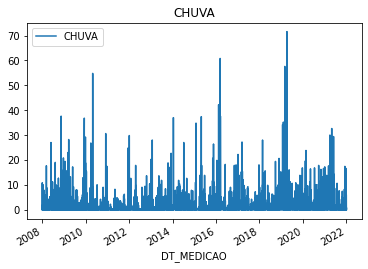

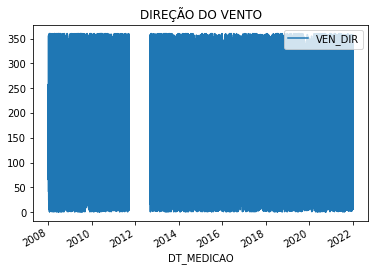

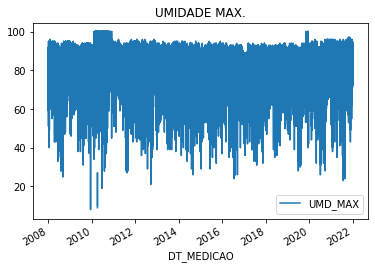

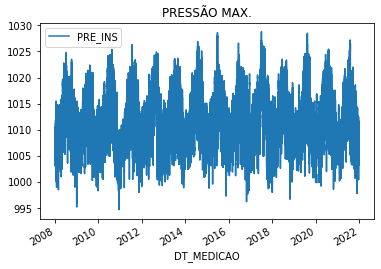

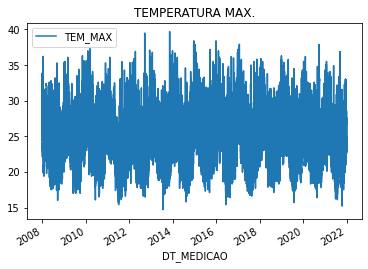

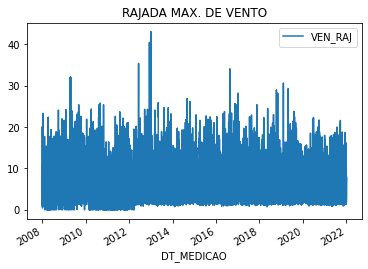

In [24]:
'''
lista = estacoes_inmet
estacoes = estacoes_inmet[estacoes_inmet['CD_ESTACAO'] == 'A652']
anos = list()

dfnew2 = pd.read_json('https://apitempo.inmet.gov.br/estacao/2008-01-01/2009-01-01/A652')                 
for i in range(2009,2022) :
  novo = pd.read_json('https://apitempo.inmet.gov.br/estacao/' + str(i) + '-01-01/'+ str(i+1) + '-01-01/A652')
  uniao = [dfnew2, novo]
  dfnew2 = pd.concat(uniao)
dfnew2.to_csv('RIO DE JANEIRO - FORTE DE COPACABANA_1997_2022.csv')

'''
df = pd.read_csv('RIO DE JANEIRO - FORTE DE COPACABANA_1997_2022.csv')
df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'], format='%Y-%m-%d')
df.plot.line('DT_MEDICAO', ['CHUVA'], title='CHUVA')
df.plot('DT_MEDICAO', ['VEN_DIR'], title='DIREÇÃO DO VENTO')
df.plot('DT_MEDICAO', ['UMD_MAX'], title='UMIDADE MAX.')
df.plot('DT_MEDICAO', ['PRE_INS'], title='PRESSÃO MAX.')
df.plot('DT_MEDICAO', ['TEM_MAX'], title='TEMPERATURA MAX.')
df.plot('DT_MEDICAO', ['VEN_RAJ'], title='RAJADA MAX. DE VENTO')


<AxesSubplot:title={'center':'RAJADA MAX. DE VENTO'}, xlabel='DT_MEDICAO'>

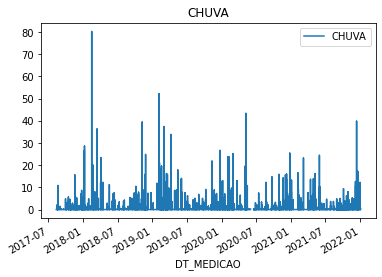

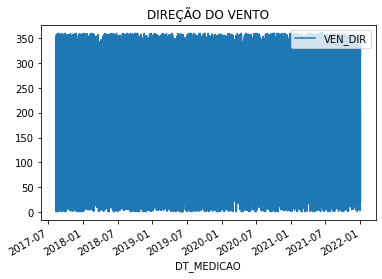

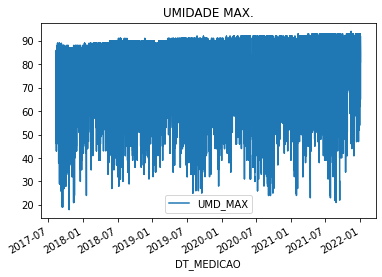

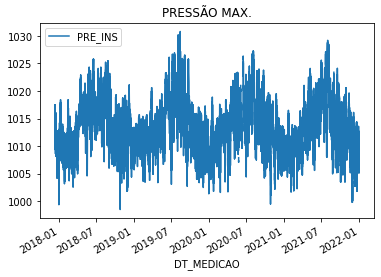

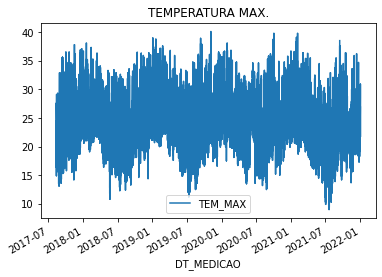

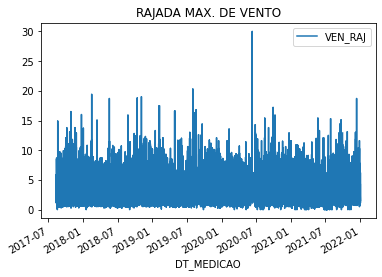

In [25]:
'''
lista = estacoes_inmet
estacoes = estacoes_inmet[estacoes_inmet['CD_ESTACAO'] == 'A636']
anos = list(range(2018,2022))

dfnew2 = pd.read_json('https://apitempo.inmet.gov.br/estacao/2017-01-01/2018-01-01/A636')                 
for i in range(2017,2022) :
  novo = pd.read_json('https://apitempo.inmet.gov.br/estacao/' + str(i) + '-01-01/'+ str(i+1) + '-01-01/A636')
  uniao = [dfnew2, novo]
  dfnew2 = pd.concat(uniao)
dfnew2.to_csv('RIO DE JANEIRO - JACAREPAGUA_1997_2022.csv')

'''
df = pd.read_csv('RIO DE JANEIRO - JACAREPAGUA_1997_2022.csv')

df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'], format='%Y-%m-%d')

df.plot.line('DT_MEDICAO', ['CHUVA'], title='CHUVA')
df.plot('DT_MEDICAO', ['VEN_DIR'], title='DIREÇÃO DO VENTO')
df.plot('DT_MEDICAO', ['UMD_MAX'], title='UMIDADE MAX.')
df.plot('DT_MEDICAO', ['PRE_INS'], title='PRESSÃO MAX.')
df.plot('DT_MEDICAO', ['TEM_MAX'], title='TEMPERATURA MAX.')
df.plot('DT_MEDICAO', ['VEN_RAJ'], title='RAJADA MAX. DE VENTO')


<AxesSubplot:title={'center':'RAJADA MAX. DE VENTO'}, xlabel='DT_MEDICAO'>

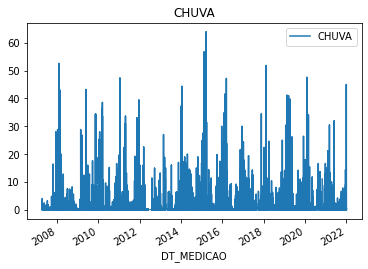

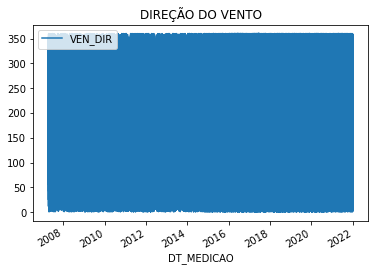

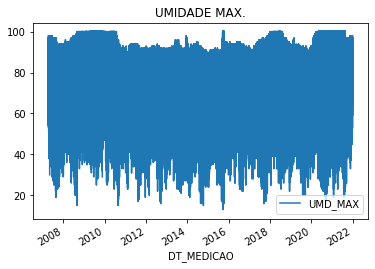

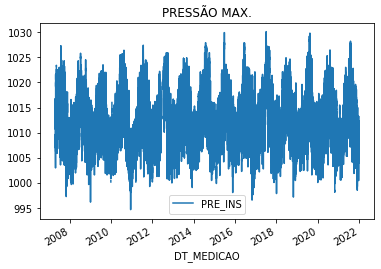

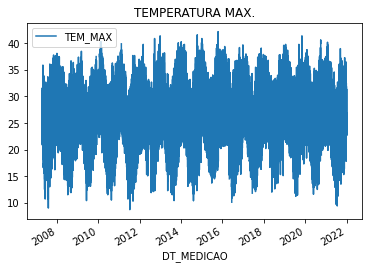

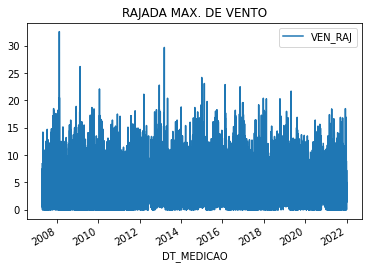

In [26]:
'''
lista = estacoes_inmet
estacoes = estacoes_inmet[estacoes_inmet['CD_ESTACAO'] == 'A621']
anos = list(range(2008,2022))

dfnew2 = pd.read_json('https://apitempo.inmet.gov.br/estacao/2007-01-01/2008-01-01/A621')                 
for i in range(2008,2022) :
  novo = pd.read_json('https://apitempo.inmet.gov.br/estacao/' + str(i) + '-01-01/'+ str(i+1) + '-01-01/A621')
  uniao = [dfnew2, novo]
  dfnew2 = pd.concat(uniao)
dfnew2.to_csv('RIO DE JANEIRO - VILA MILITAR_1997_2022.csv')

'''
df = pd.read_csv('RIO DE JANEIRO - VILA MILITAR_1997_2022.csv')

df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'], format='%Y-%m-%d')

df.plot.line('DT_MEDICAO', ['CHUVA'], title='CHUVA')
df.plot('DT_MEDICAO', ['VEN_DIR'], title='DIREÇÃO DO VENTO')
df.plot('DT_MEDICAO', ['UMD_MAX'], title='UMIDADE MAX.')
df.plot('DT_MEDICAO', ['PRE_INS'], title='PRESSÃO MAX.')
df.plot('DT_MEDICAO', ['TEM_MAX'], title='TEMPERATURA MAX.')
df.plot('DT_MEDICAO', ['VEN_RAJ'], title='RAJADA MAX. DE VENTO')


<AxesSubplot:title={'center':'RAJADA MAX. DE VENTO'}, xlabel='DT_MEDICAO'>

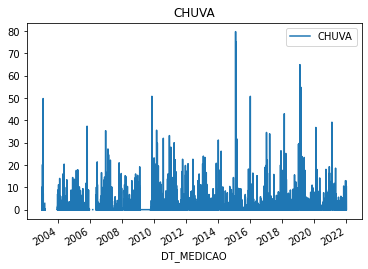

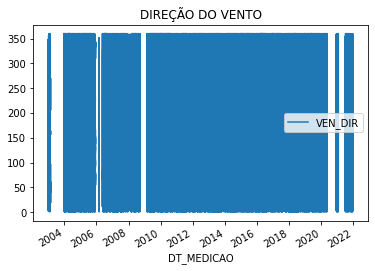

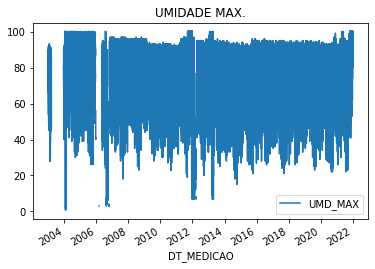

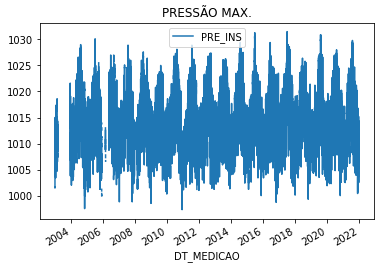

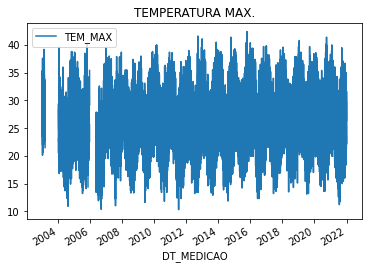

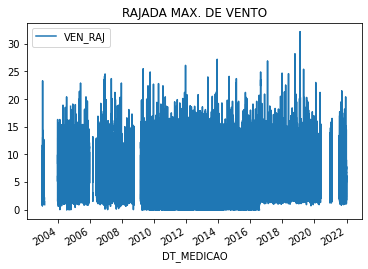

In [27]:
'''
lista = estacoes_inmet
estacoes = estacoes_inmet[estacoes_inmet['CD_ESTACAO'] == 'A602']
anos = list(range(2004,2022))

dfnew2 = pd.read_json('https://apitempo.inmet.gov.br/estacao/2003-01-01/2004-01-01/A602')                 
for i in range(2004,2022) :
  novo = pd.read_json('https://apitempo.inmet.gov.br/estacao/' + str(i) + '-01-01/'+ str(i+1) + '-01-01/A602')
  uniao = [dfnew2, novo]
  dfnew2 = pd.concat(uniao)
dfnew2.to_csv('RIO DE JANEIRO-MARAMBAIA_1997_2022.csv')

'''
df = pd.read_csv('RIO DE JANEIRO-MARAMBAIA_1997_2022.csv')
df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'], format='%Y-%m-%d')

df.plot.line('DT_MEDICAO', ['CHUVA'], title='CHUVA')
df.plot('DT_MEDICAO', ['VEN_DIR'], title='DIREÇÃO DO VENTO')
df.plot('DT_MEDICAO', ['UMD_MAX'], title='UMIDADE MAX.')
df.plot('DT_MEDICAO', ['PRE_INS'], title='PRESSÃO MAX.')
df.plot('DT_MEDICAO', ['TEM_MAX'], title='TEMPERATURA MAX.')
df.plot('DT_MEDICAO', ['VEN_RAJ'], title='RAJADA MAX. DE VENTO')


In [28]:
del df_erro, df_erro_aux, df_aux

NameError: name 'df_erro' is not defined

In [23]:
estacoes = ['RIO DE JANEIRO-MARAMBAIA','RIO DE JANEIRO - VILA MILITAR','RIO DE JANEIRO - JACAREPAGUA','RIO DE JANEIRO - FORTE DE COPACABANA']
df_erro = pd.DataFrame(columns=['Estação','PRE_INS','TEM_SEN','PRE_MAX','RAD_GLO','PTO_INS','TEM_MIN','UMD_MIN','PTO_MAX','VEN_DIR','CHUVA','PRE_MIN','UMD_MAX','VEN_VEL','PTO_MIN','TEM_MAX','TEN_BAT','VEN_RAJ','TEM_CPU','TEM_INS','UMD_INS'])
#df_erro.columns = 
for est in estacoes:
    df_aux = pd.read_csv( est + '_1997_2022.csv')
    
    print(df_aux.shape[0])

    nans1 =  round(df_aux['PRE_INS'].isna().sum()/df_aux.shape[0]*100,2)
    nans1 = 100 - round(nans1,2)
    A = str(nans1).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans2 =  round(df_aux['TEM_SEN'].isna().sum()/df_aux.shape[0]*100,2)
    nans2 = 100 - round(nans2,2)
    B = str(nans2).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans3 =  round(df_aux['PRE_MAX'].isna().sum()/df_aux.shape[0]*100,2)
    nans3 = 100 - round(nans3,2)
    C = str(nans3).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans4 =  round(df_aux['RAD_GLO'].isna().sum()/df_aux.shape[0]*100,2)
    nans4 = 100 - round(nans4,2)
    D = str(nans4).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans5 =  round(df_aux['PTO_INS'].isna().sum()/df_aux.shape[0]*100,2)
    nans5 = 100 - round(nans5,2)
    E = str(nans5).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans6 =  round(df_aux['TEM_MIN'].isna().sum()/df_aux.shape[0]*100,2)
    nans6 = 100 - round(nans6,2)
    F = str(nans6).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans7 =  round(df_aux['UMD_MIN'].isna().sum()/df_aux.shape[0]*100,2)
    nans7 = 100 - round(nans7,2)
    G = str(nans7).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans8 =  round(df_aux['PTO_MAX'].isna().sum()/df_aux.shape[0]*100,2)
    nans8 = 100 - round(nans8,2)
    H = str(nans8).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans9 =  round(df_aux['VEN_DIR'].isna().sum()/df_aux.shape[0]*100,2)
    nans9 = 100 - round(nans9,2)
    I = str(nans9).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans11 =  round(df_aux['CHUVA'].isna().sum()/df_aux.shape[0]*100,2)
    nans11 = 100 - round(nans11,2)
    J = str(nans11).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans12 =  round(df_aux['PRE_MIN'].isna().sum()/df_aux.shape[0]*100,2)
    nans12 = 100 - round(nans12,2)
    K = str(nans12).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans13 =  round(df_aux['UMD_MAX'].isna().sum()/df_aux.shape[0]*100,2)
    nans13 = 100 - round(nans13,2)
    L = str(nans13).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans14 =  round(df_aux['VEN_VEL'].isna().sum()/df_aux.shape[0]*100,2)
    nans14 = 100 - round(nans14,2)
    M = str(nans14).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans15 =  round(df_aux['PTO_MIN'].isna().sum()/df_aux.shape[0]*100,2)
    nans15 = 100 - round(nans15,2)
    N = str(nans15).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans16 =  round(df_aux['TEM_MAX'].isna().sum()/df_aux.shape[0]*100,2)
    nans16 = 100 - round(nans16,2)
    O = str(nans16).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans17 =  round(df_aux['TEN_BAT'].isna().sum()/df_aux.shape[0]*100,2)
    nans17 = 100 - round(nans17,2)
    P = str(nans17).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans18 =  round(df_aux['VEN_RAJ'].isna().sum()/df_aux.shape[0]*100,2)
    nans18 = 100 - round(nans18,2)
    Q = str(nans18).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans19 =  round(df_aux['TEM_CPU'].isna().sum()/df_aux.shape[0]*100,2)
    nans19 = 100 - round(nans19,2)
    R = str(nans19).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans20 =  round(df_aux['TEM_INS'].isna().sum()/df_aux.shape[0]*100,2)
    nans20 = 100 - round(nans20,2)
    S = str(nans20).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans21 =  round(df_aux['UMD_INS'].isna().sum()/df_aux.shape[0]*100,2)
    nans21 = 100 - round(nans21,2)
    T = str(nans21).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    nans22 =  round(df_aux['PRE_MIN'].isna().sum()/df_aux.shape[0]*100,2)
    nans22 = 100 - round(nans22,2)
    U = str(nans22).rjust(4, '0')[0:5].ljust(5, '0') + '%'
    df_erro_aux = pd.DataFrame([[df_aux['DC_NOME'][0],A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U]],columns=['Estação','PRE_INS','TEM_SEN','PRE_MAX','RAD_GLO','PTO_INS','TEM_MIN','UMD_MIN','PTO_MAX','VEN_DIR','CHUVA','PRE_MIN','UMD_MAX','VEN_VEL','PTO_MIN','TEM_MAX','TEN_BAT','VEN_RAJ','TEM_CPU','TEM_INS','UMD_INS','Teste'])
    df_erro = pd.concat([df_erro, df_erro_aux])

df_erro

167016
131856
52728
123072


,Estação,PRE_INS,TEM_SEN,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,UMD_MIN,PTO_MAX,VEN_DIR,...,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,Teste
0,RIO DE JANEIRO-MARAMBAIA,90.82%,78.52%,90.76%,90.48%,81.20%,89.91%,87.76%,81.47%,82.63%,...,88.17%,82.61%,81.41%,89.91%,76.28%,82.47%,76.28%,89.92%,87.09%,90.76%
0,RIO DE JANEIRO - VILA MILITAR,94.84%,91.89%,94.53%,93.38%,92.10%,94.54%,91.78%,91.78%,94.56%,...,91.81%,94.56%,91.77%,94.54%,94.84%,94.53%,94.82%,94.75%,92.17%,94.53%
0,RIO DE JANEIRO - JACAREPAGUÁ,67.27%,78.53%,67.25%,78.53%,78.53%,78.52%,78.52%,78.52%,78.53%,...,78.52%,78.53%,78.52%,78.52%,78.53%,78.50%,78.53%,78.53%,78.53%,67.25%
0,RIO DE JANEIRO - FORTE DE COPACABANA,98.92%,95.60%,98.89%,93.30%,95.95%,98.89%,95.89%,95.88%,91.72%,...,95.90%,98.57%,95.88%,98.89%,98.92%,98.51%,98.92%,98.91%,95.95%,98.89%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167016 entries, 0 to 167015
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    167016 non-null  int64  
 1   DC_NOME       167016 non-null  object 
 2   PRE_INS       151685 non-null  float64
 3   TEM_SEN       131134 non-null  float64
 4   VL_LATITUDE   167016 non-null  float64
 5   PRE_MAX       151585 non-null  float64
 6   UF            167016 non-null  object 
 7   RAD_GLO       151109 non-null  float64
 8   PTO_INS       135620 non-null  float64
 9   TEM_MIN       150158 non-null  float64
 10  VL_LONGITUDE  167016 non-null  float64
 11  UMD_MIN       146566 non-null  float64
 12  PTO_MAX       136070 non-null  float64
 13  VEN_DIR       137997 non-null  float64
 14  DT_MEDICAO    167016 non-null  object 
 15  CHUVA         151224 non-null  float64
 16  PRE_MIN       151585 non-null  float64
 17  UMD_MAX       147256 non-null  float64
 18  VEN_

<AxesSubplot:title={'center':'Chuva'}, xlabel='DT_MEDICAO'>

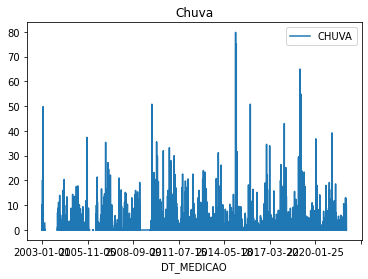

In [6]:
df_aux_teste = pd.read_csv('RIO DE JANEIRO-MARAMBAIA_1997_2022.csv')
df_aux_teste.info()


df_aux_teste.plot.line('DT_MEDICAO', ['CHUVA'], title='Chuva')

In [20]:
100 - 15792 /167016 * 100

90.54461847966662

Concatenação do xarray INMET

In [4]:
arquivos_inmet = ['RIO DE JANEIRO-MARAMBAIA','RIO DE JANEIRO - VILA MILITAR','RIO DE JANEIRO - JACAREPAGUA','RIO DE JANEIRO - FORTE DE COPACABANA']
df_xarray_inmet = pd.DataFrame()
for est in arquivos_inmet:
    df_aux = pd.read_csv('Meus/Dados/INMET/'+ est + '_1997_2022.csv')
    df_aux = df_aux.iloc[: , 1:]
    df_xarray_inmet = pd.concat([df_xarray_inmet, df_aux])

df_xarray_inmet

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,RIO DE JANEIRO-MARAMBAIA,NaN,NaN,-23.050278,NaN,RJ,NaN,NaN,NaN,-43.595556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A602,0
1,RIO DE JANEIRO-MARAMBAIA,NaN,NaN,-23.050278,NaN,RJ,NaN,NaN,NaN,-43.595556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A602,100
2,RIO DE JANEIRO-MARAMBAIA,NaN,NaN,-23.050278,NaN,RJ,NaN,NaN,NaN,-43.595556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A602,200
3,RIO DE JANEIRO-MARAMBAIA,NaN,NaN,-23.050278,NaN,RJ,NaN,NaN,NaN,-43.595556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A602,300
4,RIO DE JANEIRO-MARAMBAIA,NaN,NaN,-23.050278,NaN,RJ,NaN,NaN,NaN,-43.595556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A602,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219739,RIO DE JANEIRO - FORTE DE COPACABANA,1004.0,27.0,-22.988333,1004.4,RJ,1620.0,22.0,25.8,-43.190556,...,2.5,22.0,27.4,13.6,5.5,29.0,26.7,76.0,A652,1900
219740,RIO DE JANEIRO - FORTE DE COPACABANA,1004.1,28.0,-22.988333,1004.1,RJ,957.6,21.2,26.3,-43.190556,...,1.8,20.9,27.6,13.5,5.6,29.0,27.3,69.0,A652,2000
219741,RIO DE JANEIRO - FORTE DE COPACABANA,1004.4,28.5,-22.988333,1004.4,RJ,322.7,21.4,26.9,-43.190556,...,1.1,21.1,27.3,13.4,6.9,29.0,27.1,71.0,A652,2100
219742,RIO DE JANEIRO - FORTE DE COPACABANA,1004.9,26.5,-22.988333,1004.9,RJ,57.7,20.9,26.4,-43.190556,...,2.3,20.8,27.2,12.7,7.9,28.0,26.4,72.0,A652,2200


Exportação do Xarray

In [5]:
xarray_inmet = df_xarray_inmet.to_xarray()
xarray_inmet

<xarray.Dataset>
Dimensions:       (index: 878976)
Coordinates:
  * index         (index) int64 0 1 2 3 4 ... 219739 219740 219741 219742 219743
Data variables: (12/27)
    DC_NOME       (index) object 'RIO DE JANEIRO-MARAMBAIA' ... 'RIO DE JANEI...
    PRE_INS       (index) float64 nan nan nan ... 1.004e+03 1.005e+03 1.006e+03
    TEM_SEN       (index) float64 nan nan nan nan nan ... 28.0 28.5 26.5 25.7
    VL_LATITUDE   (index) float64 -23.05 -23.05 -23.05 ... -22.99 -22.99 -22.99
    PRE_MAX       (index) float64 nan nan nan ... 1.004e+03 1.005e+03 1.006e+03
    UF            (index) object 'RJ' 'RJ' 'RJ' 'RJ' ... 'RJ' 'RJ' 'RJ' 'RJ'
    ...            ...
    VEN_RAJ       (index) float64 nan nan nan nan nan ... 5.5 5.6 6.9 7.9 7.9
    TEM_CPU       (index) float64 nan nan nan nan nan ... 29.0 29.0 28.0 28.0
    TEM_INS       (index) float64 nan nan nan nan nan ... 27.3 27.1 26.4 25.4
    UMD_INS       (index) float64 nan nan nan nan nan ... 69.0 71.0 72.0 74.0
    CD_ESTACAO    (index) object 'A602' 'A602' 'A602' ... 'A652' 'A652' 'A652'
    HR_MEDICAO    (index) int64 0 100 200 300 400 ... 1900 2000 2100 2200 2300

# Radiossondagem

Bibliotecas

In [61]:
import pandas as pd
import os
import numpy as np

In [64]:
texto = 'D:/Programacao/TCC/Meus/Dados/RADIOSSONDAGEM/BRM00083746-data.txt'
data1 = pd.read_csv(texto, sep=' ', header=None)

ParserError: Error tokenizing data. C error: Expected 23 fields in line 1008, saw 24
